<a href="https://colab.research.google.com/github/Yonaki97/DataScience/blob/main/BIGDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("city_temperature.csv",on_bad_lines='skip')

/tmp/ipython-input-2231962396.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("city_temperature.csv",on_bad_lines='skip')


In [ ]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [ ]:
df.shape

(2906327, 8)

In [ ]:
df.drop(columns='State',inplace=True)

In [ ]:
# ada data anomali pada tanggal, yakni tahun 200 dan 201
df.loc[df['Year'] == 201, 'Year'] = 2001
df.loc[df['Year'] == 200, 'Year'] = 2000

In [ ]:
df.isnull().sum()

,0
Region,0
Country,0
City,0
Month,0
Day,0
Year,0
AvgTemperature,0


In [ ]:
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


In [ ]:
df['Date'] = pd.to_datetime(
    dict(year=df['Year'], month=df['Month'], day=df['Day']),
    errors='coerce'  # invalid dates jadi NaT
)

In [ ]:
df['Region'].unique()

array(['Africa', 'Asia', 'Australia/South Pacific', 'Europe',
       'Middle East', 'North America',
       'South/Central America & Carribean'], dtype=object)

#Benua

In [ ]:
df_Africa = df.loc[df['Region'] == 'Africa']
df_Asia = df.loc[df['Region'] == 'Asia']
df_Europe = df.loc[df['Region'] == 'Europe']
df_Australia_South_Pasific = df.loc[df['Region'] == 'Australia/South Pacific']
df_Middle_East = df.loc[df['Region'] == 'Middle East']
df_North_America = df.loc[df['Region'] == 'North America']
df_South_America = df.loc[df['Region'] == 'South/Central America & Carribean']

In [ ]:
bins = [1995, 2000, 2005, 2010, 2015, 2020]
labels = ['1995–2000', '2001–2005', '2006–2010', '2011–2015', '2016–2020']

df['Period'] = pd.cut(df['Year'], bins=bins, labels=labels, right=True)


In [ ]:
df_grouped = df.groupby(['Region', 'Period'])['AvgTemperature'].mean().reset_index()


/tmp/ipython-input-4062418014.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['Region', 'Period'])['AvgTemperature'].mean().reset_index()


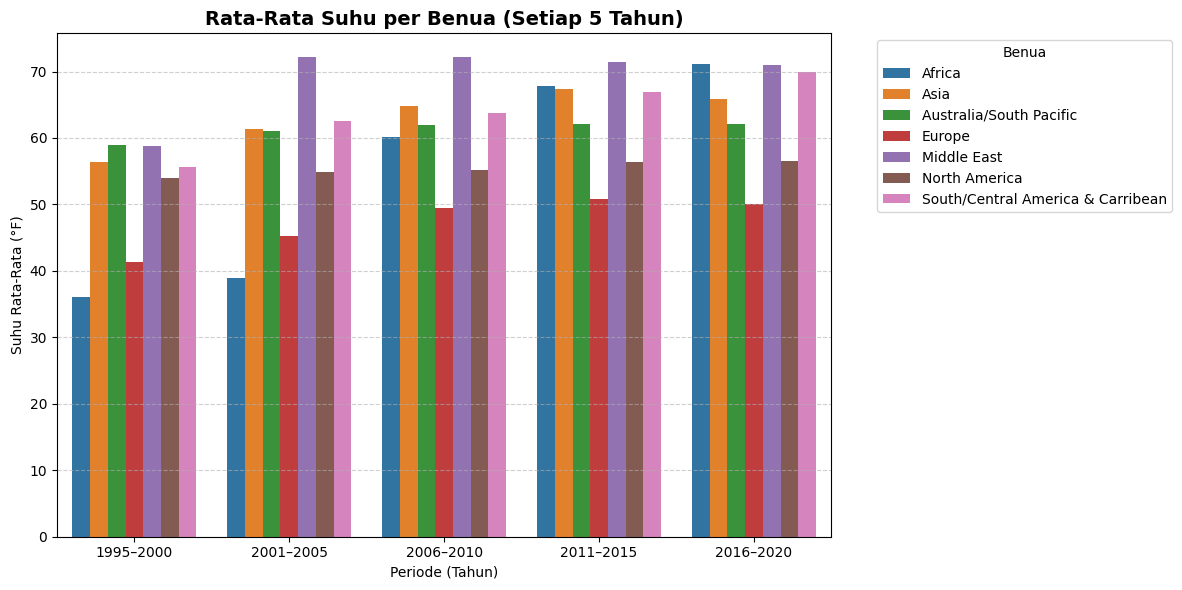

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_grouped,
    x='Period', y='AvgTemperature', hue='Region'
)

plt.title('Rata-Rata Suhu per Benua (Setiap 5 Tahun)', fontsize=14, weight='bold')
plt.xlabel('Periode (Tahun)')
plt.ylabel('Suhu Rata-Rata (°F)')
plt.legend(title='Benua', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

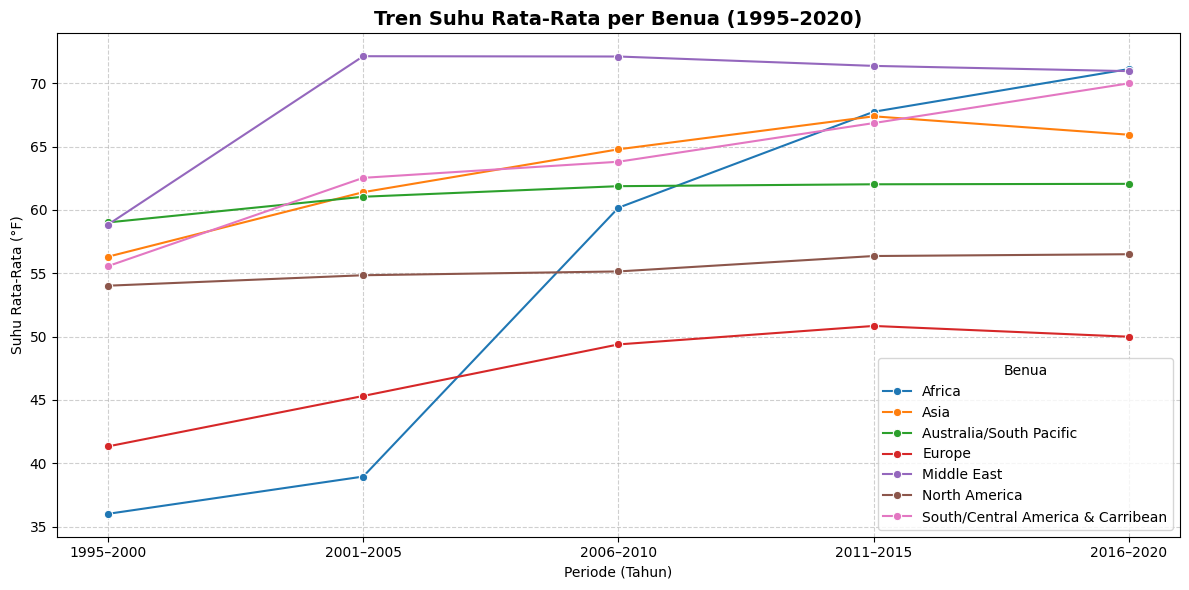

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_grouped,
    x='Period', y='AvgTemperature', hue='Region', marker='o'
)
plt.title('Tren Suhu Rata-Rata per Benua (1995–2020)', fontsize=14, weight='bold')
plt.xlabel('Periode (Tahun)')
plt.ylabel('Suhu Rata-Rata (°F)')
plt.legend(title='Benua')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#Negara

In [ ]:
df['Region'].unique()

array(['Africa', 'Asia', 'Australia/South Pacific', 'Europe',
       'Middle East', 'North America',
       'South/Central America & Carribean'], dtype=object)

In [ ]:
# Pastikan Period sudah ada, atau buat dari kolom 'Year'
df_Africa['Period'] = (df_Africa['Year'] // 5) * 5  # contoh: 1995→1995, 1999→1995, 2003→2000

df_Africa_grouped = (
    df_Africa.groupby(['Country', 'Period'], as_index=False)['AvgTemperature']
    .mean()
)

df_Europe['Period'] = (df_Europe['Year'] // 5) * 5  # contoh: 1995→1995, 1999→1995, 2003→2000

df_Europe_grouped = (
    df_Europe.groupby(['Country', 'Period'], as_index=False)['AvgTemperature']
    .mean()
)

df_Asia['Period'] = (df_Asia['Year'] // 5) * 5  # contoh: 1995→1995, 1999→1995, 2003→2000

df_Asia_grouped = (
    df_Asia.groupby(['Country', 'Period'], as_index=False)['AvgTemperature']
    .mean()
)

df_Middle_East['Period'] = (df_Middle_East['Year'] // 5) * 5  # contoh: 1995→1995, 1999→1995, 2003→2000

df_Middle_East_grouped = (
    df_Middle_East.groupby(['Country', 'Period'], as_index=False)['AvgTemperature']
    .mean()
)

df_Australia_South_Pasific['Period'] = (df_Australia_South_Pasific['Year'] // 5) * 5  # contoh: 1995→1995, 1999→1995, 2003→2000

df_Australia_South_Pasific_grouped = (
    df_Australia_South_Pasific.groupby(['Country', 'Period'], as_index=False)['AvgTemperature']
    .mean()
)
df_South_America['Period'] = (df_South_America['Year'] // 5) * 5
df_South_America_grouped = (
    df_South_America.groupby(['Country', 'Period'], as_index=False)['AvgTemperature']
    .mean()
)

df_North_America['Period'] = (df_North_America['Year'] // 5) * 5
df_North_America_grouped = (
    df_North_America.groupby(['Country', 'Period'], as_index=False)['AvgTemperature']
    .mean()
)

/tmp/ipython-input-2794879947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Africa['Period'] = (df_Africa['Year'] // 5) * 5  # contoh: 1995→1995, 1999→1995, 2003→2000
/tmp/ipython-input-2794879947.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Europe['Period'] = (df_Europe['Year'] // 5) * 5  # contoh: 1995→1995, 1999→1995, 2003→2000
/tmp/ipython-input-2794879947.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

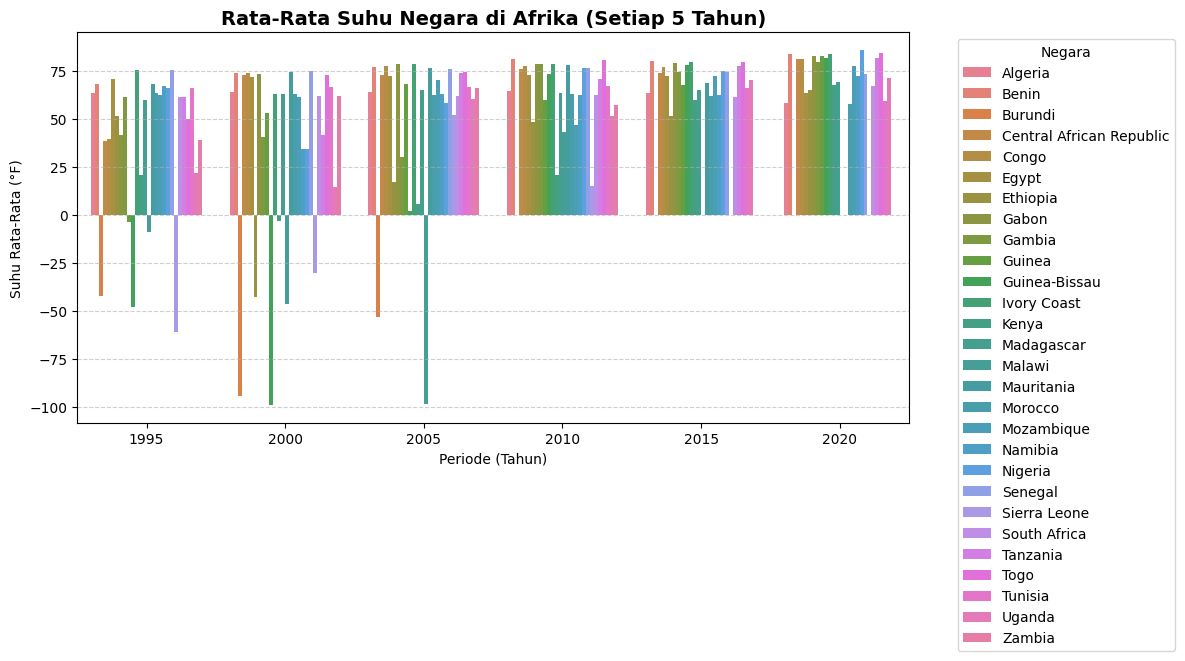

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_Africa_grouped,
    x='Period',
    y='AvgTemperature',
    hue='Country'
)

plt.title('Rata-Rata Suhu Negara di Afrika (Setiap 5 Tahun)', fontsize=14, weight='bold')
plt.xlabel('Periode (Tahun)')
plt.ylabel('Suhu Rata-Rata (°F)')
plt.legend(title='Negara', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

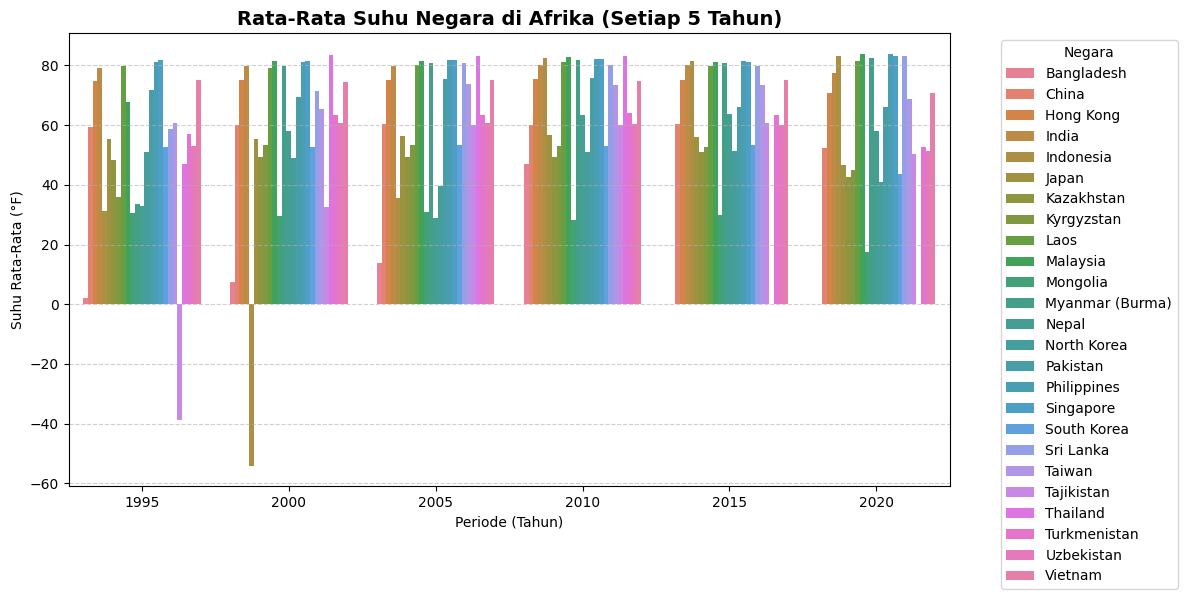

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_Asia_grouped,
    x='Period',
    y='AvgTemperature',
    hue='Country'
)

plt.title('Rata-Rata Suhu Negara di Afrika (Setiap 5 Tahun)', fontsize=14, weight='bold')
plt.xlabel('Periode (Tahun)')
plt.ylabel('Suhu Rata-Rata (°F)')
plt.legend(title='Negara', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

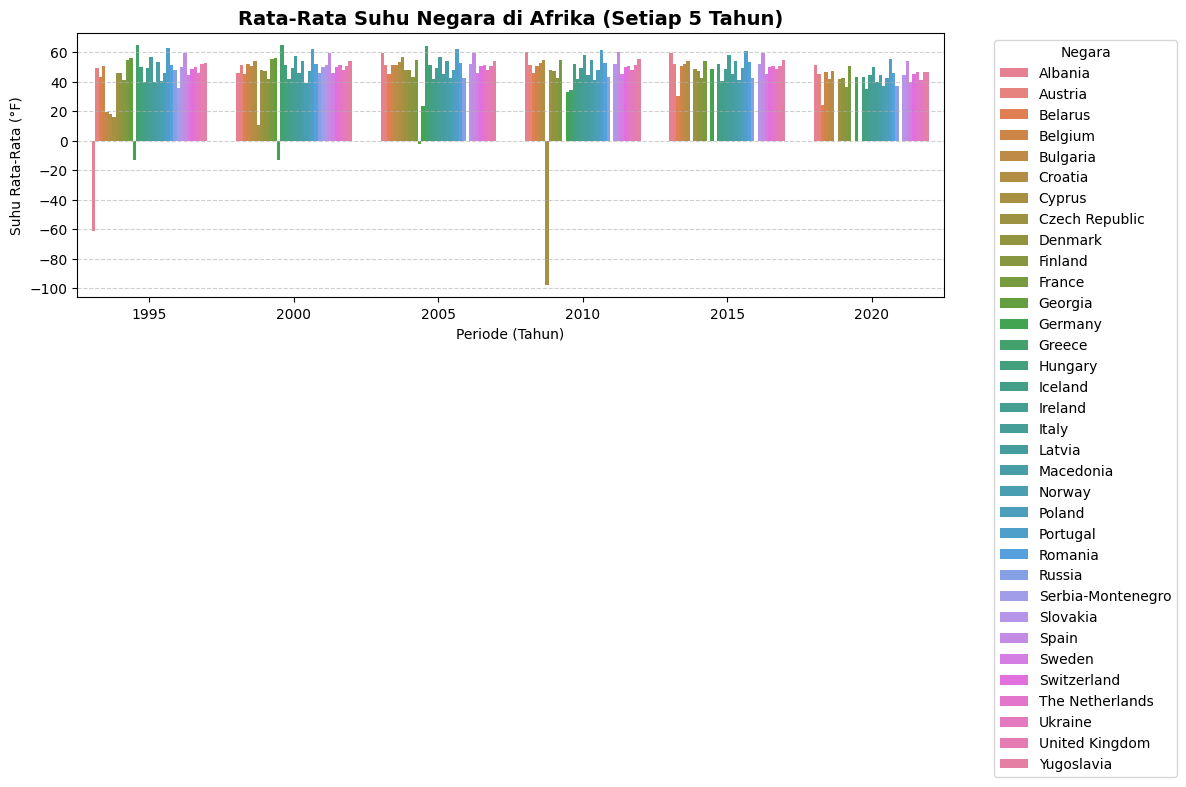

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_Europe_grouped,
    x='Period',
    y='AvgTemperature',
    hue='Country'
)

plt.title('Rata-Rata Suhu Negara di Afrika (Setiap 5 Tahun)', fontsize=14, weight='bold')
plt.xlabel('Periode (Tahun)')
plt.ylabel('Suhu Rata-Rata (°F)')
plt.legend(title='Negara', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

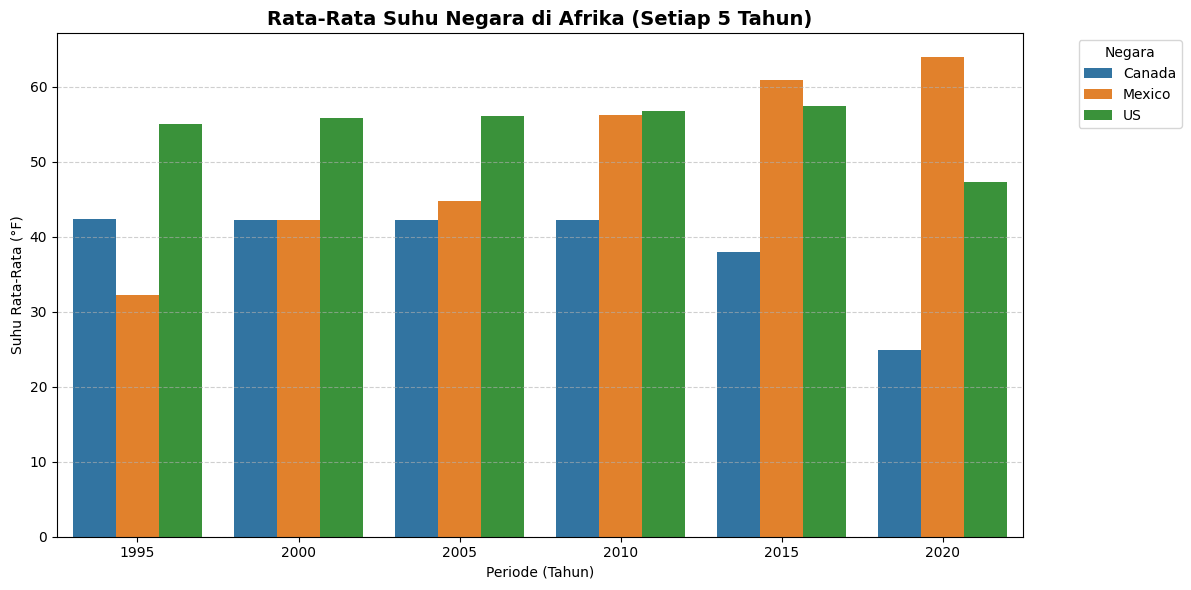

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_North_America_grouped,
    x='Period',
    y='AvgTemperature',
    hue='Country'
)

plt.title('Rata-Rata Suhu Negara di Afrika (Setiap 5 Tahun)', fontsize=14, weight='bold')
plt.xlabel('Periode (Tahun)')
plt.ylabel('Suhu Rata-Rata (°F)')
plt.legend(title='Negara', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

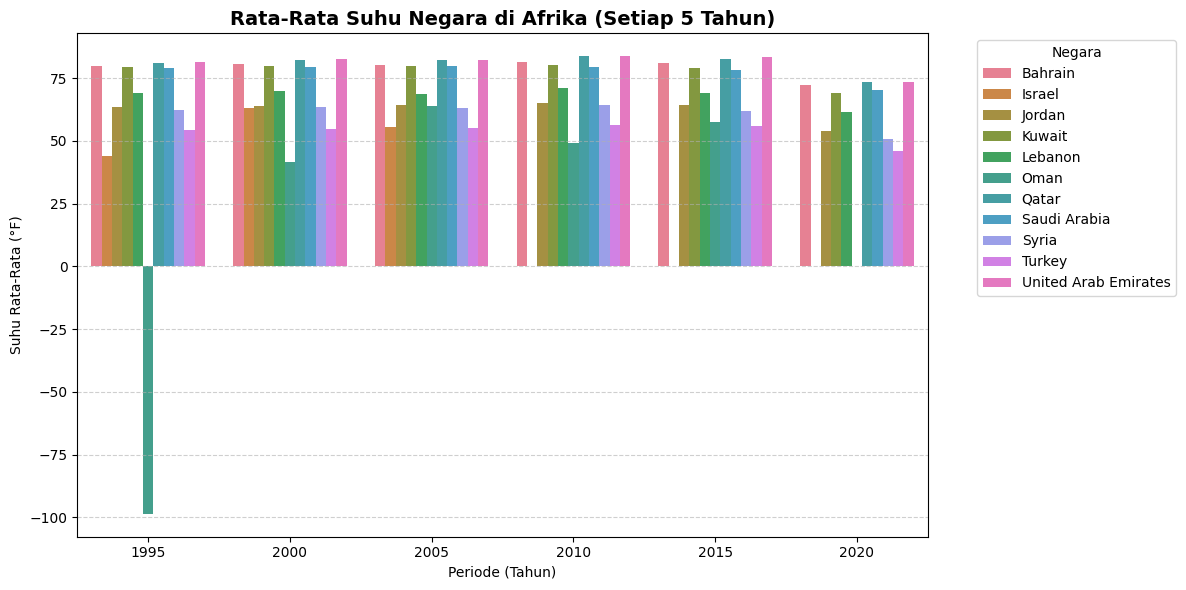

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_Middle_East_grouped,
    x='Period',
    y='AvgTemperature',
    hue='Country'
)

plt.title('Rata-Rata Suhu Negara di Afrika (Setiap 5 Tahun)', fontsize=14, weight='bold')
plt.xlabel('Periode (Tahun)')
plt.ylabel('Suhu Rata-Rata (°F)')
plt.legend(title='Negara', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

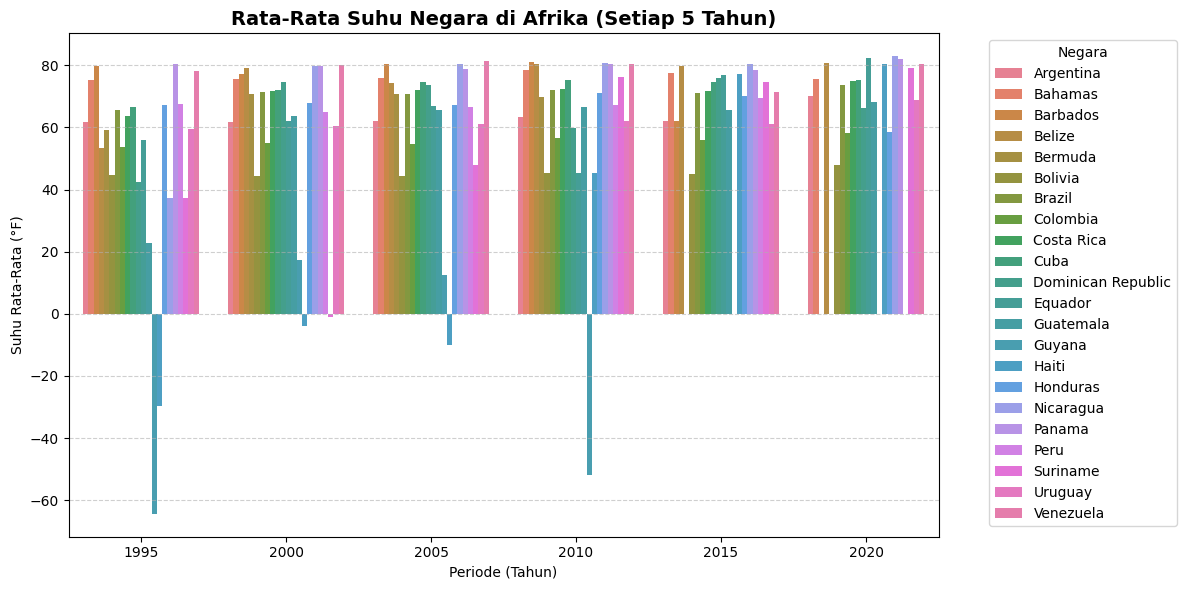

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_South_America_grouped,
    x='Period',
    y='AvgTemperature',
    hue='Country'
)

plt.title('Rata-Rata Suhu Negara di Afrika (Setiap 5 Tahun)', fontsize=14, weight='bold')
plt.xlabel('Periode (Tahun)')
plt.ylabel('Suhu Rata-Rata (°F)')
plt.legend(title='Negara', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

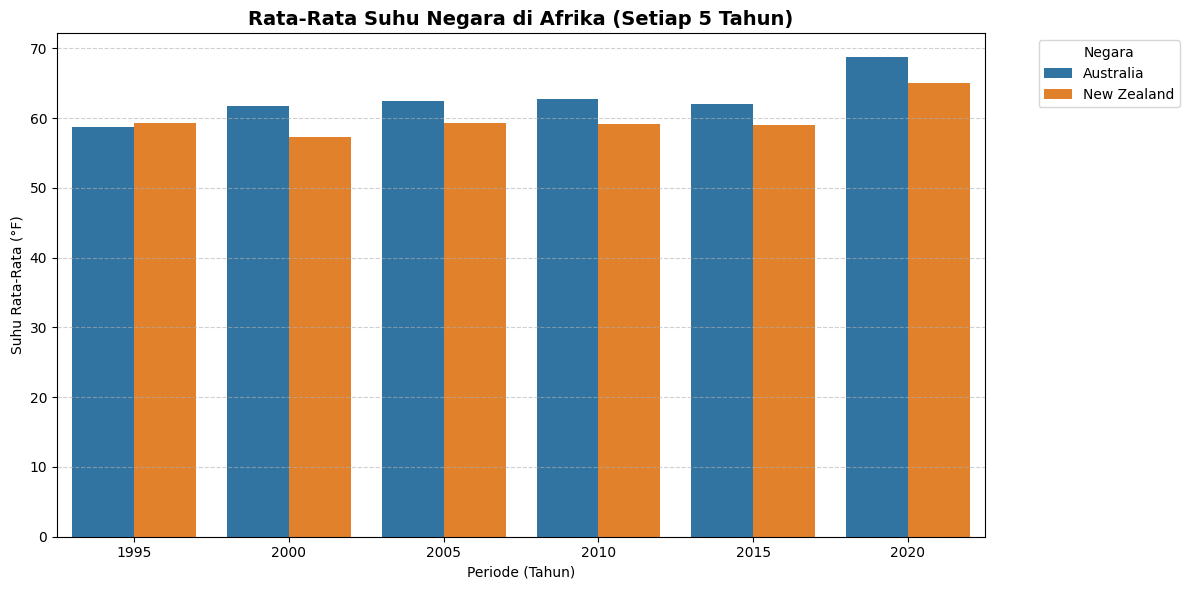

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_Australia_South_Pasific_grouped,
    x='Period',
    y='AvgTemperature',
    hue='Country'
)

plt.title('Rata-Rata Suhu Negara di Afrika (Setiap 5 Tahun)', fontsize=14, weight='bold')
plt.xlabel('Periode (Tahun)')
plt.ylabel('Suhu Rata-Rata (°F)')
plt.legend(title='Negara', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()